# <span style="color:green">Exploração </span> e <span style="color:green">Análise </span> dos dados
- - -
Em continuação ao notebook **dataset.ipynb**, este tem como objetivo realizar a análise da amostragem.
- - -
> **%run *.ipynb***: Roda o notebook anterior, com objetivo de buscar o dataset

> **%%capture**: Retira os outputs do notebook

> **df**: junção das tabelas "data" e "target"

In [1]:
%%capture
%run dataset.ipynb
df = data.join(target)
####
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import andrews_curves
from sklearn import feature_selection
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

## <span style="color:green">1. </span> Análise de Outliers
- - -
O Gráfico a seguir faz o *boxplot* das colunas em função da classe com objetivo de detectar possíveis outliers no dataset.

> A princípio, nota-se que existem alguns valores que fogem dos valores dos quartis. Porém, essas outliers não estão discrepantes e não necessitam de ajuste.

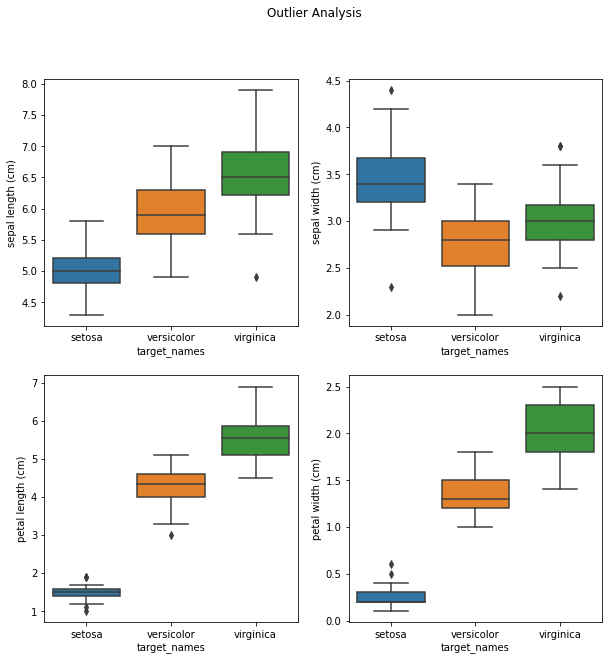

In [2]:
f, axes = plt.subplots(2,2, figsize=(10,10))
f.suptitle("Outlier Analysis")
sns.boxplot(x='target_names', y='sepal length (cm)', data=df, ax = axes[0,0])
sns.boxplot(x='target_names', y='sepal width (cm)', data=df, ax = axes[0,1])
sns.boxplot(x='target_names', y='petal length (cm)', data=df, ax = axes[1,0])
sns.boxplot(x='target_names', y='petal width (cm)', data=df, ax = axes[1,1])
plt.show()

## <span style="color:green">2. </span> Análise de correlação
- - -
O Gráfico a seguir mostra a corelação entre as colunas da amostragem. A diagonal representa a distribuição dos valores da coluna.
- - - 
**Note que**:

> A Classe **Setosa** difere-se das outras em diversos gráficos, isso facilitará sua classificação

> Existe correlação entre o **comprimento e largura das Pétalas**

> Existe correlação entre as classes no caso do **comprimento e largura das Sépalas**

> A Distribuição das **Pétalas** da classe **Setosa** está bem definida e diverge das outras classes. Isso significa que é possível classificar as **Setosas** só com o tamanho e comprimento das pétalas.

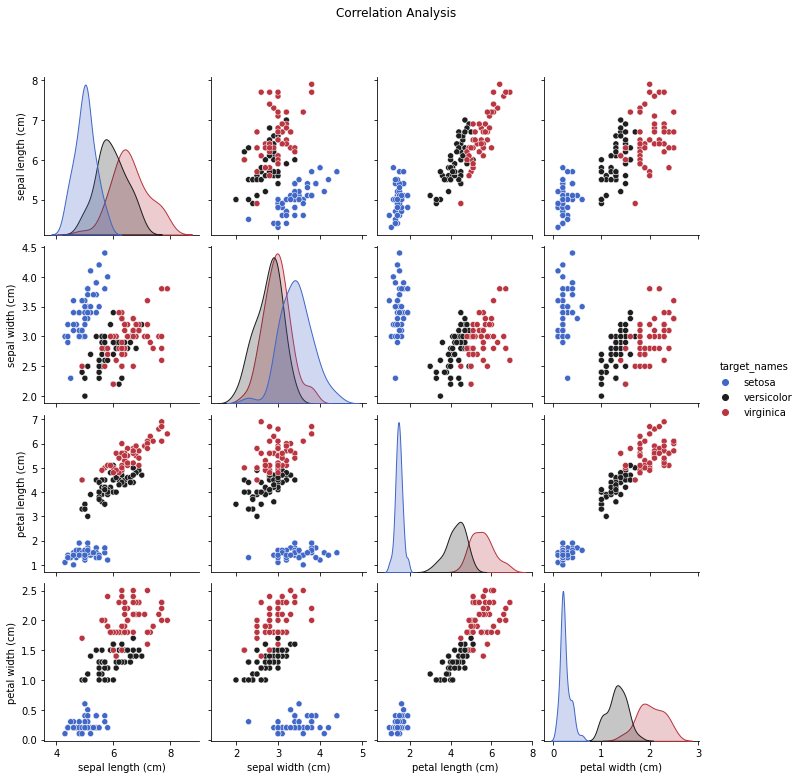

In [3]:
graph = sns.pairplot(df.drop('target', axis=1), hue='target_names', palette="icefire")
graph.fig.suptitle("Correlation Analysis", y=1.08)
plt.show()

### <span style="color:green">2.1. </span> Heatmap
O Gráfico a seguir mostra o mapa de calor das correlações. Quanto mais próximo de 1, maior é a correlação entre as colunas.

> Existe Correlação entre o **comprimento da Sépala** e o **comprimento da Pétala**

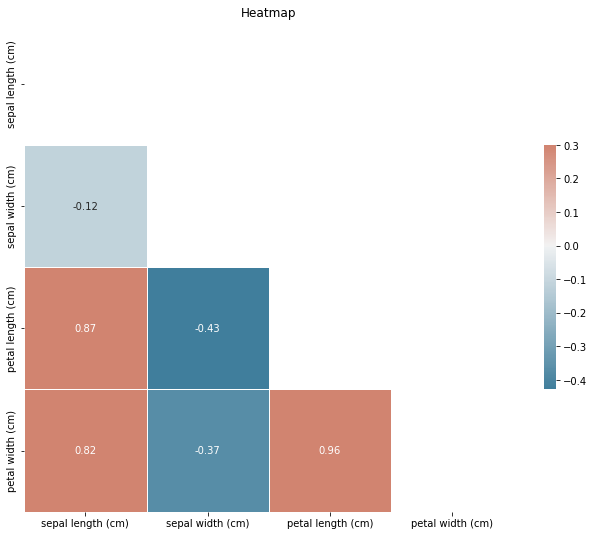

In [4]:
corr = df.drop(['target','target_names'], axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center = 0, square = True, linewidth=.5, cbar_kws={"shrink":.5}, annot=True)
ax.set_title("Heatmap")
plt.show()

### <span style="color:green">2.2. </span> Curva de Andrews

A Curva de Andrews é uma forma de visualizar a estrutura multi-dimencional da amostra. Para cada variável é definida uma série de Fourier.
- - -
**Note que**:

> É possível distinguir as curvas da classe **Setosa**.

> As classes **Versicolor** e **Virginica** não se distinguem.

**Em um cenário onde a amostragem é não-supervisionada, esta técnica acusaria que existem apenas 2 classes.**

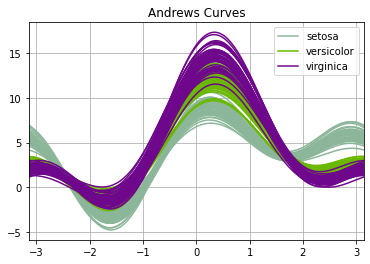

In [5]:
plt.title("Andrews Curves")
andrews_curves(df.drop("target", axis=1), "target_names")
plt.show()

# <span style="color:green">3. </span> Análise de Importância das Variáveis

## <span style="color:green">3.1. </span> Chi-Square
A técnica de **Chi2** testa a independência das variáveis. Esta faz a medida do desvio entre a amostra e a sua respectiva classe.

**Chi2 é uma técnica supervisionada e com classes discretas**.

**Quanto maior o valor de Chi2, maior a importância da variável para classe**.

In [6]:
chi2, pval = feature_selection.chi2(df.drop(['target','target_names'], axis=1), df.target)
chi2_df = pd.DataFrame(chi2,df.columns[:-2], columns=['Chi2'])
chi2_df

,Chi2
sepal length (cm),10.817821
sepal width (cm),3.710728
petal length (cm),116.312613
petal width (cm),67.048360


## <span style="color:green">3.2. </span> F_Classif

A técnica de F_Classif é baseada no teste estatístico de **Análise de Variância** **(ANOVA)**. 

**Quanto maior o valor da ANOVA, maior a importância da variável para sua respectiva classe**

In [7]:
f_c, pval = feature_selection.f_classif(df.drop(['target','target_names'], axis=1), df.target)
f_c_df = pd.DataFrame(f_c, df.columns[:-2], columns=['F_Classif'])
f_c_df

,F_Classif
sepal length (cm),119.264502
sepal width (cm),49.160040
petal length (cm),1180.161182
petal width (cm),960.007147


## <span style="color:green">3.3. </span> Mutual_info_classification

A técnica de **Informação Mutual para Classificação** testa qualquer tipo de dependência entre as variáveis, inclusive a não-linear.

O Resultado é um valor entre 0 e 1.

**Quanto mais próximo de 1, maior é a importância da variável para classificação**.

In [8]:
mutual = feature_selection.mutual_info_classif(df.drop(['target','target_names'], axis=1), df.target)
mutual_df = pd.DataFrame(mutual, df.columns[:-2], columns=['Mutual_info'])
mutual_df

,Mutual_info
sepal length (cm),0.471758
sepal width (cm),0.272720
petal length (cm),0.992785
petal width (cm),0.981136


### <span style="color:green">3.4. </span> Resultados

A tabela a seguir demonstra o resultado das 3 técnicas testadas para análise de importância das variáveis.


**Note que**:

> **Os resultados concordam entre si.**

> **Em ordem de importância: O Comprimento e Largura da Pétala são as variáveis mais relevantes, seguido do Comprimento e Largura da Sépala**

> **Os resultados concordam com o resultado demonstrado na descrição do dataset.**

In [9]:
chi2_df.join([mutual_df,f_c_df])

,Chi2,Mutual_info,F_Classif
sepal length (cm),10.817821,0.471758,119.264502
sepal width (cm),3.710728,0.272720,49.160040
petal length (cm),116.312613,0.992785,1180.161182
petal width (cm),67.048360,0.981136,960.007147



## <span style="color:green">4. </span> Análise de componentes principais

A análise de componentes principais **(PCA)** é uma técnica não-supervisionada utilizada para redução de dimensionalidade. Uma vez que existe correlação entre as colunas, como demonstrado na **Analise de correlações**,é válida a utilização do PCA com objetivo de reduzir a quantidade de variáveis da amostragem.


In [10]:
iris_PCA = PCA(n_components=3).fit_transform(df.drop(['target','target_names'], axis=1))

## <span style="color:green">4.1. </span> Resultado da PCA

Com objetivo de verificar a efetividade da técnica de PCA nesta amostragem, faz-se o plot 3D dos autovetores resultantes.


/tmp/ipykernel_5456/2367258154.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = Axes3D(f)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
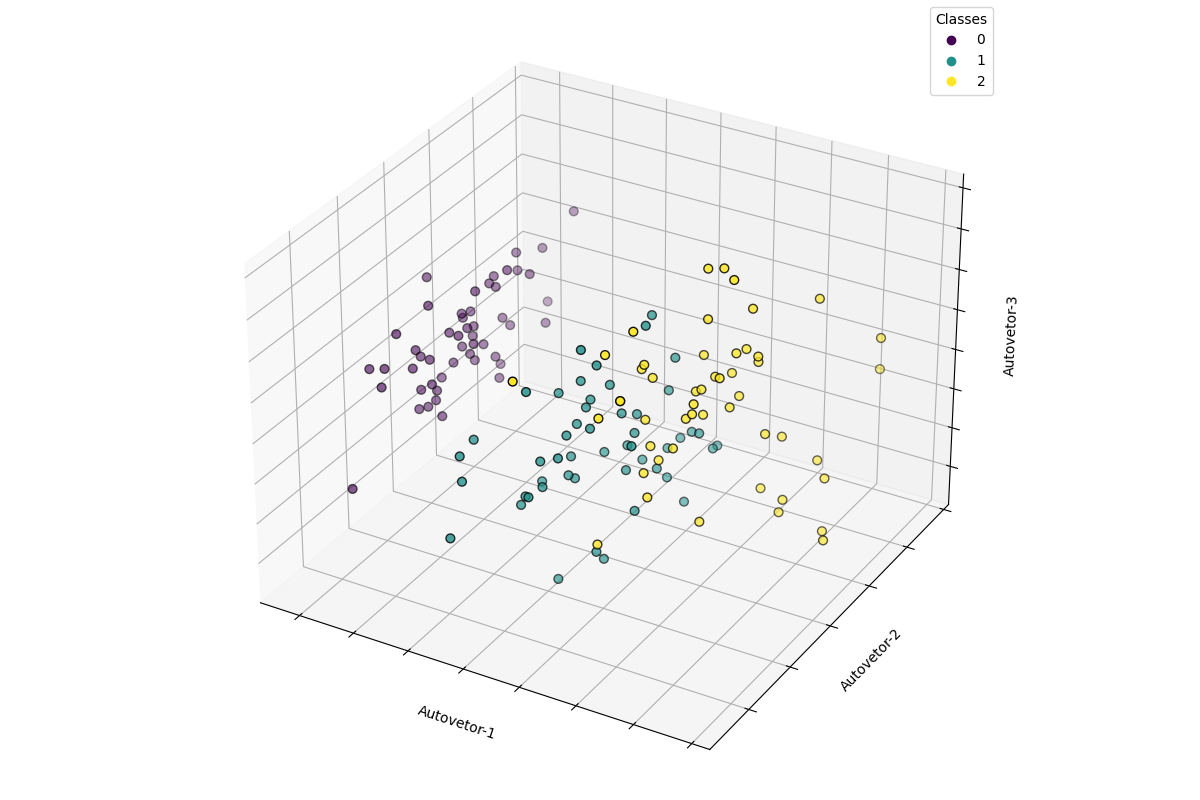

In [11]:
%matplotlib widget

f = plt.figure(1, figsize=(12,8))
axes = Axes3D(f)
scatter = axes.scatter(iris_PCA[:, 0], iris_PCA[:,1], iris_PCA[:,2], c=df['target'], cmap='viridis', edgecolor='k', s=40)

axes.set_xlabel("Autovetor-1")
axes.w_xaxis.set_ticklabels([])
axes.set_ylabel("Autovetor-2")
axes.w_yaxis.set_ticklabels([])
axes.set_zlabel("Autovetor-3")
axes.w_zaxis.set_ticklabels([])
axes.legend(*scatter.legend_elements(),title='Classes')
plt.show()

**Por mais que PCA seja uma técnica não-supervisionada, o resultado é satisfatório, pois é possível destinguir as classes a partir dos autovetores resultantes**.